# Model Analysis

## Import Modules

In [1]:
from RunParameters import RunParameters
from TDistribution import TDist

## Check Run Parameters

In [2]:
EPOCHS = '200k'
REF = '200k'
BKG = '10k'
MODEL = 'v1'
WCLIP = 100

NTOYS = 150

DATA_FOLDER = '/lustre/cmswork/nlai/DRIFT_TIME/'
OUT_PATH = DATA_FOLDER + f'E{EPOCHS}R{REF}B{BKG}W{WCLIP}_{MODEL}'
DOF = 10
NFOLDER = 0

rPar = RunParameters(OUT_PATH, NFOLDER, NTOYS)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E200000_latent3_layers1_wclip100.0_ntoy150_ref200000_bkg10000_sig0_patience1000
File name: E200000_latent3_layers1_wclip100.0_ntoy150_ref200000_bkg10000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          150                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        100.0                                            
 Epochs:        200000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 10000 0 



## Model Analysis

In [3]:
BINS = 7
SAVE_FIG = 0

tDist = TDist(DOF, BINS, toys, epochs, check_point_t, w_clip, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 148/150

Median t distribution:  11.7462685
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.3024            Median significance: 0.5175            from chi2 distribution


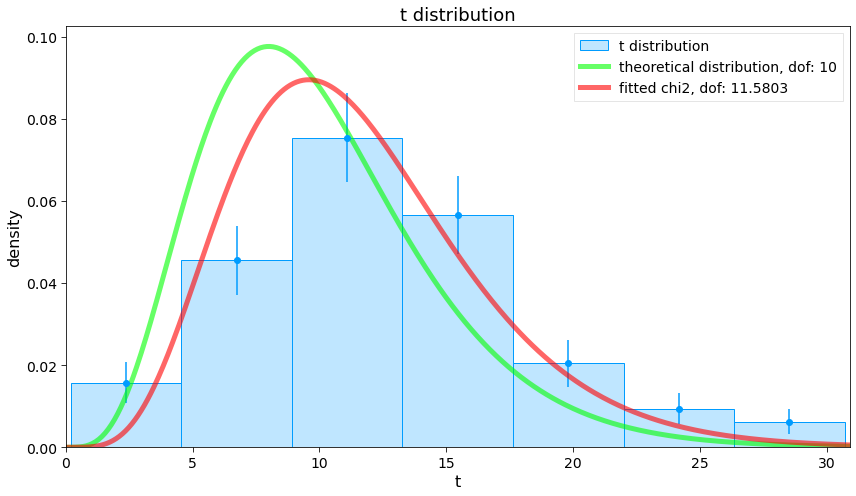

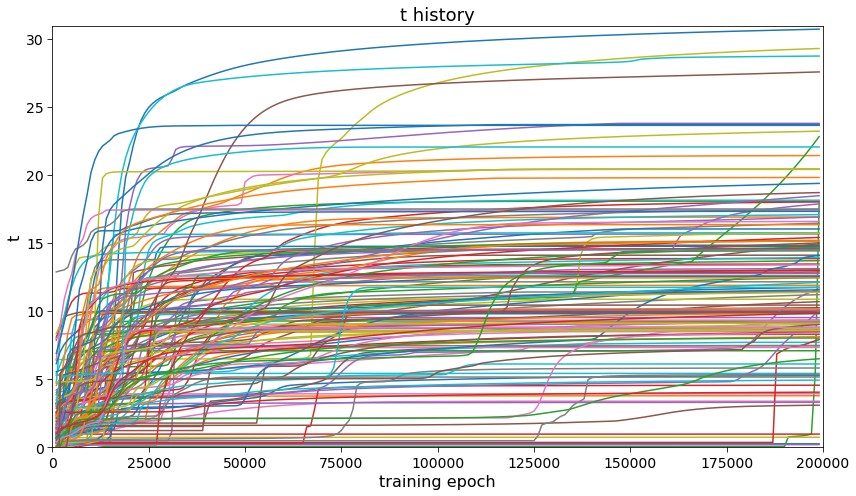

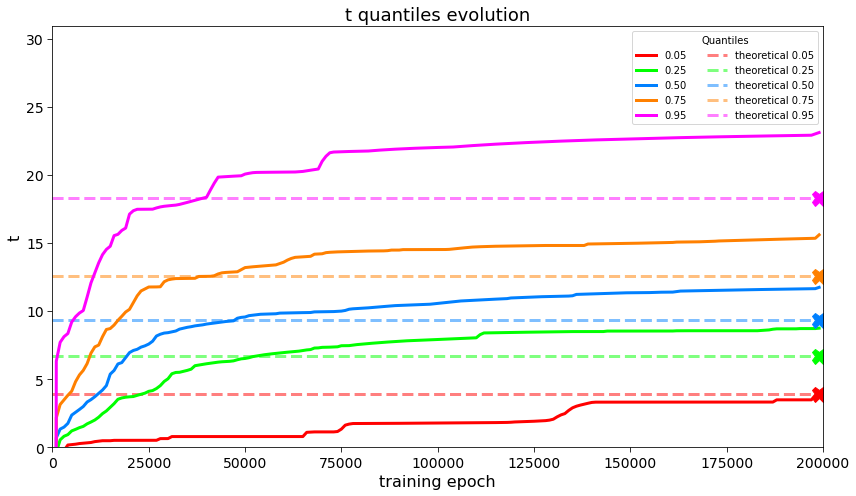

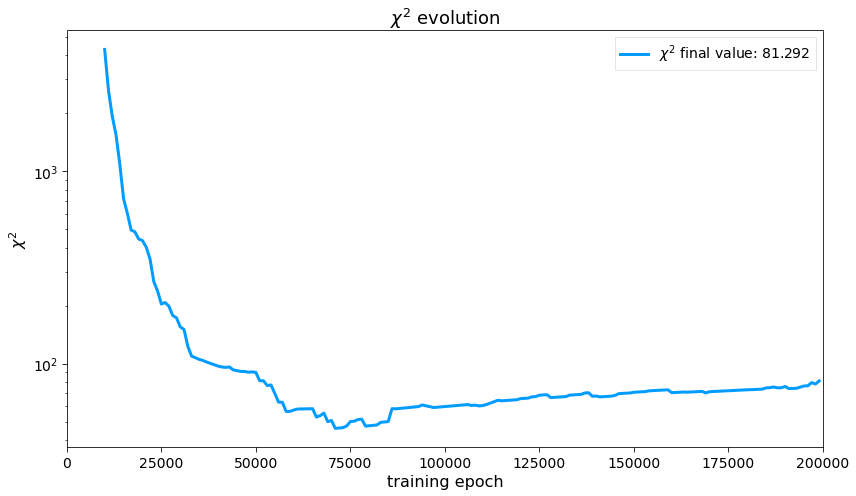

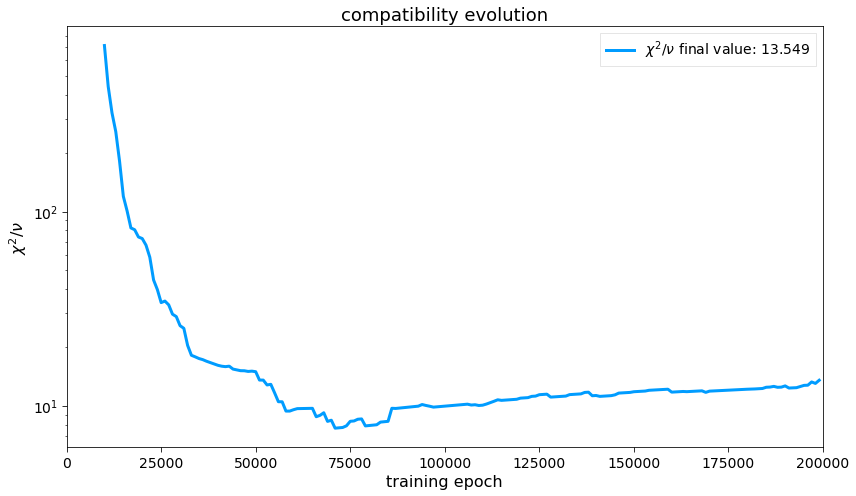

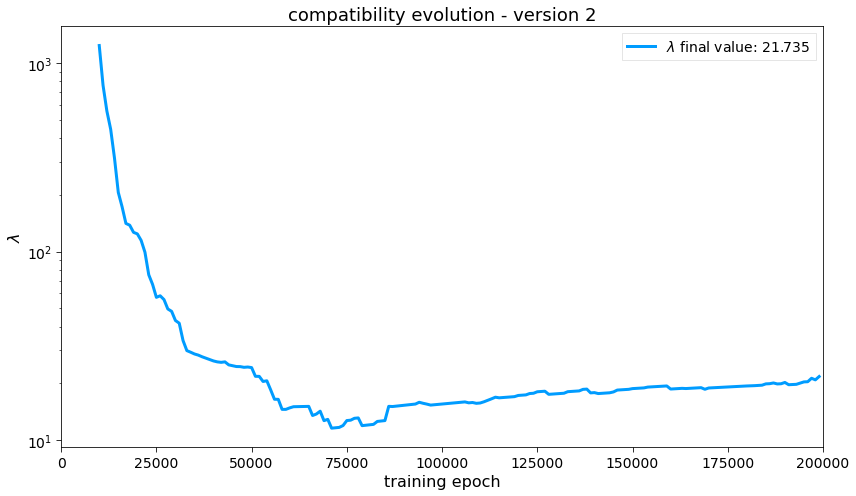

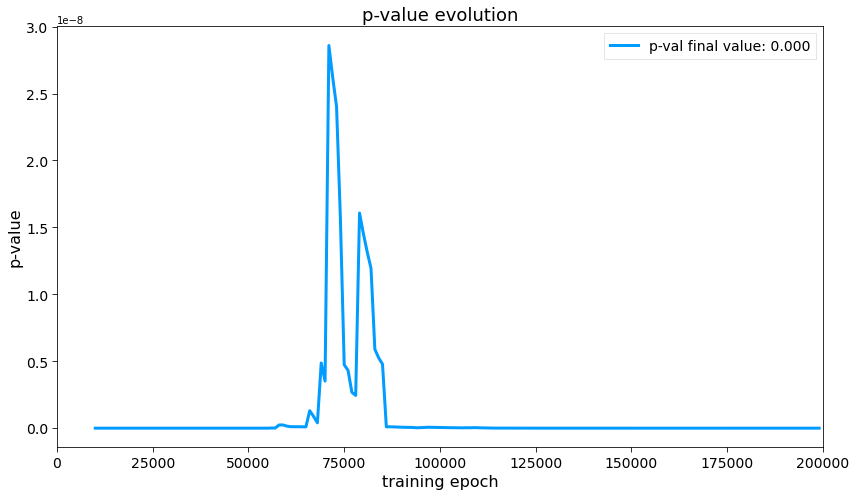

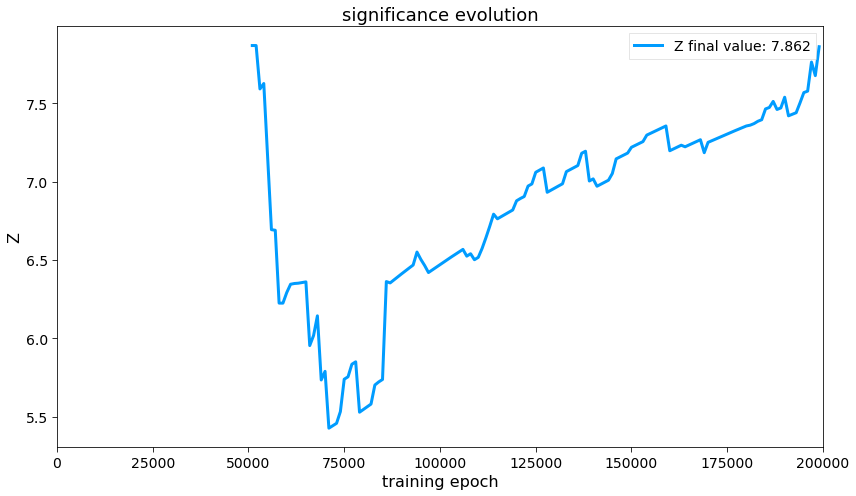

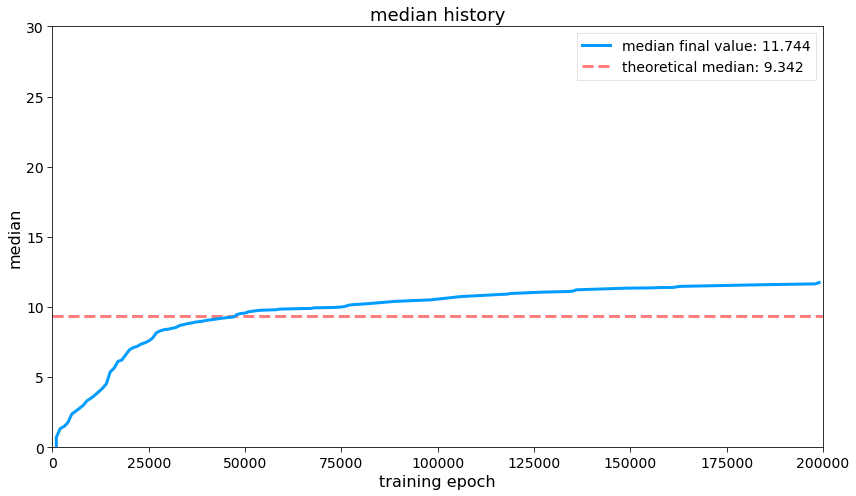

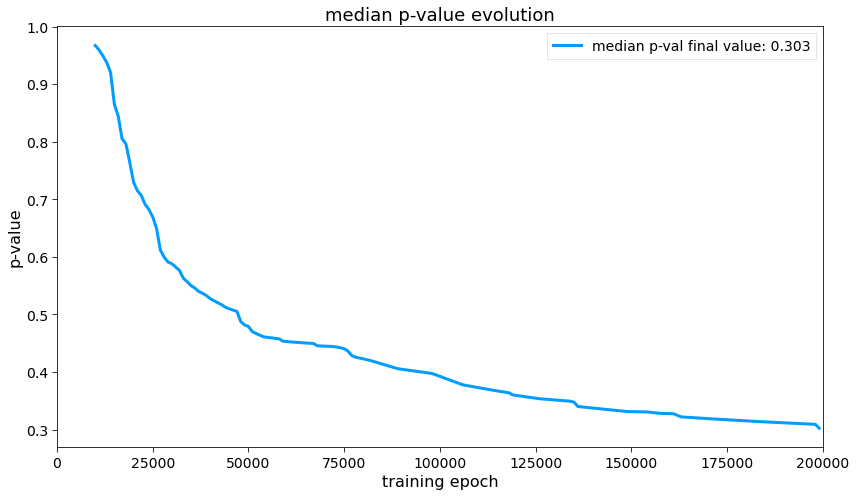

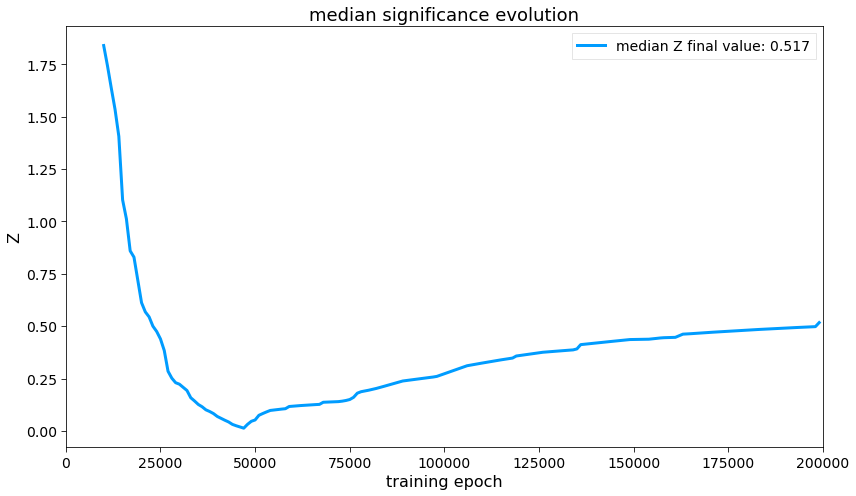

In [4]:
tDist.plotTdist()
tDist.plotThistory()
tDist.plotQuantilesEvo()
tDist.plotChi2History()
tDist.plotChi2Compatibility()
tDist.plotChi2Compatibility2()
tDist.plotPValHistory()
tDist.plotSignificanceHistory()
tDist.plotMedianHistory()
tDist.plotMedianPval()
tDist.plotMedianZ()

In [5]:
tDist.t_list.sort()
tDist.t_list

array([ 0.196433,  0.256152,  0.737216,  0.96881 ,  3.09674 ,  3.30431 ,
        3.384369,  3.786617,  3.932051,  4.0482  ,  4.558741,  4.934483,
        5.159161,  5.264273,  5.340322,  5.425385,  5.823035,  6.117387,
        6.515239,  7.089458,  7.331948,  7.465467,  7.468915,  7.706445,
        7.974027,  8.023111,  8.126595,  8.29212 ,  8.387115,  8.474151,
        8.498404,  8.552339,  8.555014,  8.575058,  8.694221,  8.714374,
        8.729487,  8.801372,  8.831643,  9.019547,  9.035858,  9.109348,
        9.142786,  9.17024 ,  9.17305 ,  9.273008,  9.292498,  9.293835,
        9.332788,  9.342533,  9.5258  ,  9.815805,  9.830379,  9.854544,
        9.890475,  9.896806,  9.967989, 10.066229, 10.066819, 10.173189,
       10.248087, 10.341436, 10.441658, 10.705717, 10.868967, 11.216545,
       11.385038, 11.404229, 11.409375, 11.436661, 11.565497, 11.693104,
       11.745502, 11.747035, 11.897984, 12.119729, 12.150693, 12.441257,
       12.469268, 12.556021, 12.570789, 12.607208, 

In [6]:
tDist.epochs

200000